<a href="https://colab.research.google.com/github/toledoangel/tomatoDetectionDeep/blob/main/YOLOV7_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transfer Learning YOLOV7**

_________________________________________________________________________________________________________________________________________________________________________________________________________
Angel Toledo Flores<br>
Ingeniero Mecánico Agrícola/Ingeniero en Sistemas Computacionales.<br>
**E-mail**: contactoangeltoledo@gmail.com<br>
 [Linkedin profile](https://www.linkedin.com/in/angel-toledo/) | [Portafolio de proyectos](https://resume.ingesaurio.com/) <br> 


# Instalación de YOLOV7

In [ ]:
# Clone repo
!git clone https://github.com/WongKinYiu/yolov7.git
!cd yolov7
!pip install --upgrade pip 

In [ ]:
# Install requierements (in case if work in enviroment)
!pip install -r requierements
!sudo apt install -y zip htop screen libgl1-mesa-glx

In [ ]:
import torch
import utils
display = utils.notebook_init()  # checks

# Inferencia de objetos

Para los pesos entrenador previamente, esto puede servir para confirmar que los módulos funcionan y utilizar los mismos comandos para su modelo entrenado. Los pesos deben estar en la carpeta yolov7, o bien descargar los pesos preentrenados en https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt en yolov7 <br>

```
python detect.py --source 0 #webacm
                          img.jpg #image
                          vid.mp4 #video
                          path/ #directory
                          path/*.jpg #glob
                          "https:youtube.be/algo" #Youtube Video
                          "rtsp://example.com/media.mp4" #RTSP, RTM, HTTP Steam
```




Si todo sale bien debería ver 
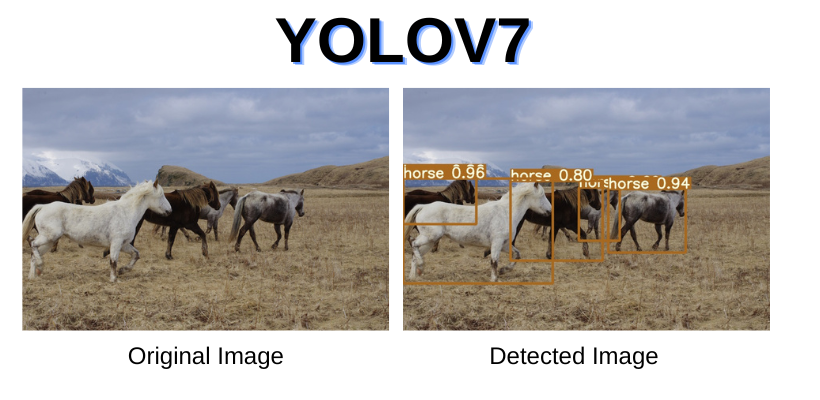

In [ ]:
!python detect.py --weights yolov7.pt --source inference/images/horses.jpg --img 640

# Procesamiento de datos

Se requieren las etiquetas de datos en un .txt de la forma 


```
<object class id> <x> <y> <width> <height>
```
<br>
Se recomienda dividir el dataset en 80% train 20% test
<br>
En un archivo personalizado .yaml se necesita los siguiente


```
train: (Complete path to dataset train folder)
test: (Complete path to dataset test folder) 
valid: (Complete path to dataset valid folder)
#Classes
nc: 1 # replace according to your number of classes
#classes names
#replace all class names list with your classes names
names: ['person', 'etiqueta 2', 'etiqueta x'] 
```





# Train 

--img : tamaño de la imagen (predeterminado 640)
--bach size: tamaño del lote
--epochs: epocas
--data: ruta del archivo de configuración .yaml
--weights: pesos prentrenados ( [yolov7.pt](https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt), 
[yolov7x.pt](https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7x_training.pt), 
[ yolov7-w6.pt](https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6_training.pt), 
[yolov7-e6.pt](https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6_training.pt)  )

In [ ]:
!source yolov7training/bin/activate
!train.py --weights yolov7.pt --data "data/custom.yaml" --workers 4 --batch-size 4 --img 416 --cfg cfg/training/yolov7.yaml --name yolov7 --hyp data/hyp.scratch.p5.yaml --epochs 50